In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing

# 1.3 Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor

In [2]:
tdf = pd.read_csv("VCAP_6h5uM_8496x979_plusFP_4RF.csv", index_col=0)

In [3]:
tdf.head(5)

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B,ASAH1,RALA,ARHGEF12,SOX2,...,STK10,UGDH,SQRDL,HEBP1,ATP11B,CD320,MLLT11,CEBPZ,CBR3,FP
Fc1ccc(cc1)C(CCCN1CCC2(CC1)N(CNC2=O)c1ccccc1)c1ccc(F)cc1,-2.408152,-1.655671,-0.367278,-0.325467,-0.548683,1.198617,0.791782,-0.263802,0.171996,1.767374,...,0.806054,-1.087923,-0.965089,-1.037843,0.873085,-2.987011,-0.664129,-0.741389,-1.425130,0100000000000000000000000100000000001000000000...
Clc1cc(NC(=O)c2cccnc2)c2[nH]c3cnccc3c2c1,-0.693584,0.274823,-0.366057,0.624723,-0.523555,1.138508,-0.482495,-0.660448,0.068612,1.596762,...,1.082427,0.692690,-0.045938,-0.879646,-0.434579,-0.535164,-3.506028,1.474298,-1.023953,0000000000000000000101000000000000000000000000...
COc1cc2ncn(-c3cc(OCc4ccccc4S(C)(=O)=O)c(s3)C#N)c2cc1OC,-0.192084,0.476562,1.514186,-1.435214,1.570700,-1.025688,1.033461,-0.822262,-0.059363,0.016299,...,-0.181878,-0.644439,0.493344,0.382869,1.152795,-0.448823,-1.082161,-0.879882,-0.522663,0000000000000000000000000000000001000000000001...
Cc1ccc(NCCCc2ccccc2)c(N)c1,-0.477887,0.408927,0.546041,0.777510,1.260274,-0.937103,-0.081637,0.195335,0.668935,-1.176721,...,0.035274,0.119218,1.419109,-0.736008,-0.640280,0.992096,0.541546,0.867118,0.038096,0000000000000000000001000000000001000000001000...
CC(CN1c2ccccc2Sc2ccccc12)N(C)C,0.305443,0.165697,-0.802020,-0.336790,-0.693069,-0.586183,0.494013,-0.077427,0.003155,-0.097454,...,0.084574,0.283908,-0.312846,0.029839,0.107668,0.546962,-0.196331,0.815647,0.490176,0100000000000000000000000000000001000000000000...


# Make X_data and y_data from the matrix

In [5]:
X_data = tdf["FP"].tolist()
X_data = map(lambda x: list(x), X_data)
X_data = np.array(list(X_data))
X_data = X_data.astype(float)
#X_scaled = preprocessing.scale(X_data)
#features = X_scaled
features = X_data

In [6]:
### Get the 'labels'
labelendindex = len(tdf.columns.values)-1

label_name_list = tdf.columns.values[0:labelendindex]

#label_name_list = tdf.columns.values[0:2] ### use only 1 label

labels = tdf[label_name_list].values.tolist()

labels = np.array(labels)
#y_data = reshape_data_into_2_dim(y_data)
#y_data.ndim
#labels_scaled = preprocessing.scale(labels)
#min_max_scaler = preprocessing.MinMaxScaler()

In [7]:
labels

array([[-2.408152  , -1.6556708 , -0.36727807, ..., -0.664129  ,
        -0.7413894 , -1.4251302 ],
       [-0.69358426,  0.2748226 , -0.36605698, ..., -3.5060282 ,
         1.4742982 , -1.0239532 ],
       [-0.1920842 ,  0.47656178,  1.5141863 , ..., -1.082161  ,
        -0.8798819 , -0.5226634 ],
       ...,
       [ 0.74255955,  0.13079414, -0.71997   , ..., -0.34200025,
         0.42730966,  0.38271192],
       [ 0.18369249, -0.7252985 ,  1.0479712 , ...,  0.618565  ,
        -0.3439053 , -0.9325733 ],
       [ 1.8926135 ,  0.14048547,  0.91434073, ..., -2.8821568 ,
         0.4114801 , -0.06077427]])

In [8]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler


transformer = MinMaxScaler().fit(labels)
print(transformer)
rl = transformer.transform(labels)
print(rl)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.56338384 0.46298477 0.63071499 ... 0.42244079 0.24112541 0.67628533]
 [0.70819261 0.61376833 0.63079494 ... 0.26852619 0.3976628  0.70792548]
 [0.75054825 0.62952542 0.75390632 ... 0.39980056 0.23134098 0.74746135]
 ...
 [0.82948628 0.60251881 0.60762203 ... 0.43988698 0.3236935  0.81886675]
 [0.78228555 0.53565264 0.72338028 ... 0.49191029 0.2692075  0.71513245]
 [0.92661741 0.60327577 0.71463065 ... 0.30231448 0.32257515 0.78388975]]


In [9]:
labels

array([[-2.408152  , -1.6556708 , -0.36727807, ..., -0.664129  ,
        -0.7413894 , -1.4251302 ],
       [-0.69358426,  0.2748226 , -0.36605698, ..., -3.5060282 ,
         1.4742982 , -1.0239532 ],
       [-0.1920842 ,  0.47656178,  1.5141863 , ..., -1.082161  ,
        -0.8798819 , -0.5226634 ],
       ...,
       [ 0.74255955,  0.13079414, -0.71997   , ..., -0.34200025,
         0.42730966,  0.38271192],
       [ 0.18369249, -0.7252985 ,  1.0479712 , ...,  0.618565  ,
        -0.3439053 , -0.9325733 ],
       [ 1.8926135 ,  0.14048547,  0.91434073, ..., -2.8821568 ,
         0.4114801 , -0.06077427]])

# Split train/test

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import *

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.10, random_state = 1)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7646, 1024)
Training Labels Shape: (7646, 978)
Testing Features Shape: (850, 1024)
Testing Labels Shape: (850, 978)


In [12]:
def show_image(X_test,y_test_predict,name,y_mse):
  ## scattor plot
  plt.figure(figsize=(8,6))
  plt.scatter(y_test_predict[name],y_test,cmap='plasma')
  plt.title(name)
  plt.show()
  print('RMSE for ',name,' is ',y_mse[name])
  ##to plot the faces
  #image_shape = (64, 64)
  #plt.figure(figsize=(10,10))
  #j = 0


In [13]:
ESTIMATORS = {
    "Dummy": DummyRegressor(strategy='mean', constant=None, quantile=None),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=1000,
                                                   max_depth=6,
                                                   min_samples_leaf=4,
                                                   random_state=2)
}

In [15]:
ESTIMATORS = {
    "Dummy": DummyRegressor(strategy='mean', constant=None, quantile=None),
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     # Out of 20000
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=1000,
                                                   max_depth=6,
                                                   min_samples_leaf=4,
                                                   random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=6),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
}

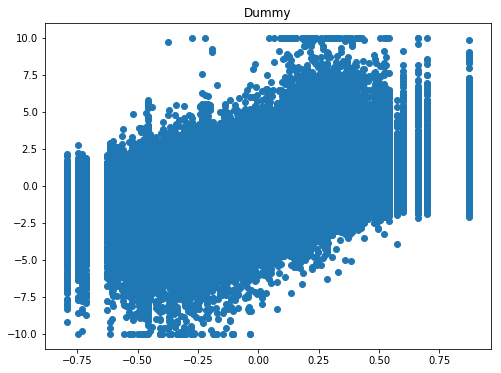

RMSE for  Dummy  is  1.156004561066913


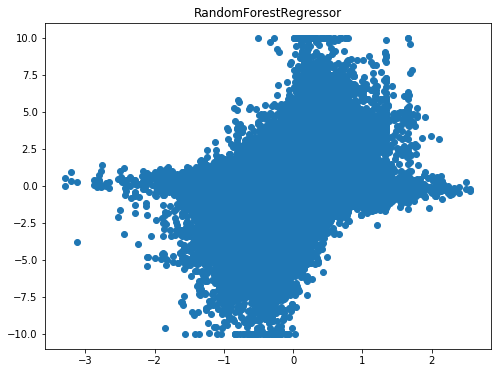

RMSE for  RandomForestRegressor  is  1.1384494319398952


In [14]:
# 9.1 Create an empty dictionary to collect prediction values
y_test_predict = dict()
y_mse = dict()

for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    y_mse[name] = mean_squared_error(y_test, estimator.predict(X_test))
    show_image(X_test,y_test_predict,name,y_mse)

<Figure size 288x432 with 0 Axes>

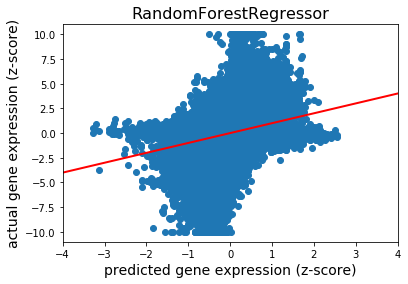

In [45]:
plt.figure(figsize=(4,6))
fig, ax = plt.subplots(ncols=1)
ax.scatter(y_test_predict['RandomForestRegressor'],y_test,cmap='plasma')
plt.title("RandomForestRegressor", fontsize=16)
plt.xlabel("predicted gene expression (z-score)", fontsize=14)
plt.ylabel("actual gene expression (z-score)", fontsize=14)
plt.ylim(-11,11)
plt.xlim(-4,4)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, linewidth=2.0, color='r')
plt.savefig("RFR1.svg")


<Figure size 576x432 with 0 Axes>

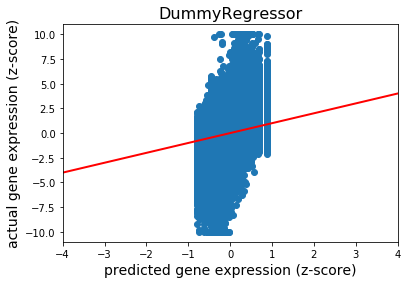

In [46]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(ncols=1)
ax.scatter(y_test_predict['Dummy'],y_test,cmap='plasma')
plt.title("DummyRegressor", fontsize=16)
plt.xlabel("predicted gene expression (z-score)", fontsize=14)
plt.ylabel("actual gene expression (z-score)", fontsize=14)
plt.ylim(-11,11)
plt.xlim(-4,4)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, linewidth=2.0, color='r')
plt.savefig("DumR1.svg")

In [453]:
### make dummy regressor
dr = DummyRegressor(strategy='median', constant=None, quantile=None)

In [357]:
### random forest regressor
rf = RandomForestRegressor(n_estimators = 1000, 
                           random_state = 69, n_jobs=1, min_samples_leaf = 10, 
                           verbose=3, max_features="log2")

In [359]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
            'max_features': ("auto","log2"),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=3)
    # Perform K-Fold CV
    scores = cross_val_predict(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    return scores

In [375]:
# grid search - depth and estimators
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10,1000),
        ''
    },
    cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)
grid_result = gsc.fit(features, rl)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 132.0min finished


In [ ]:
grid_result.best_estimator_

In [378]:
rfr = grid_result.best_estimator_

In [393]:
rfr.n_jobs=-1

In [454]:
rfr.fit(train_features, train_labels)
rf_pred = rfr.predict(test_features)
rf_error = abs(rf_pred - test_labels)
print('Mean Absolute Error:', round(np.mean(rf_error), 4), 'z')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
buildin

building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tre

building tree 639 of 1000
building tree 640 of 1000
building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tre

building tree 955 of 1000
building tree 956 of 1000
building tree 957 of 1000
building tree 958 of 1000
building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [455]:
dr.fit(train_features,train_labels)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [456]:
dr.fit(train_features,train_labels)
dummypred = dr.predict(test_features)
dummyerrors = abs(dummypred - test_labels)
print('Mean dummy Absolute Error:', round(np.mean(dummyerrors), 4), 'z')

Mean dummy Absolute Error: 0.0598 z


In [442]:
mse = mean_squared_error(test_labels, rf_pred, multioutput='uniform_average')

In [443]:
mse = mean_squared_error(test_labels, rf_pred, multioutput='uniform_average')
dmse = mean_squared_error(test_labels, dummypred, multioutput='uniform_average')
len(mse)
xaxis = np.array(range(0,978))
error=list(mse)
plt.plot(xaxis, dmse)


TypeError: object of type 'numpy.float64' has no len()

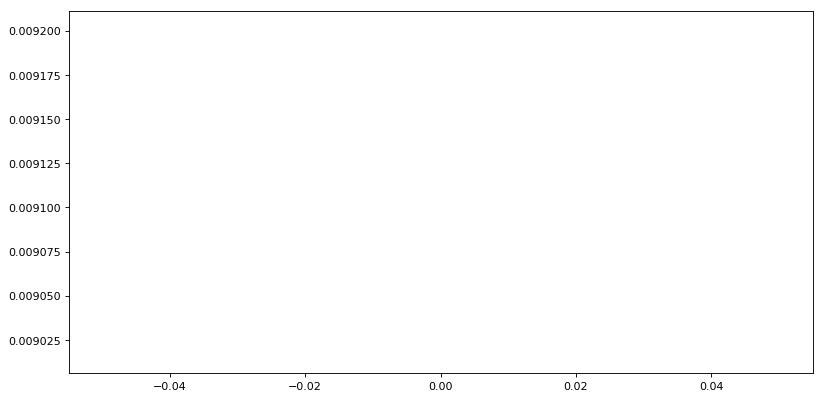

In [445]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
mse = mean_squared_error(test_labels, rf_pred, multioutput='raw_values')
dmse = mean_squared_error(test_labels, dummypred, multioutput='raw_values')
len(mse)
xaxis = np.array(range(0,len(mse)))
error=list(mse)
plt.plot(xaxis, dmse)
plt.plot(xaxis, mse)

In [419]:
test_labels[0]

array([0.73799872, 0.55954278, 0.59587292, 0.52756267, 0.29933278,
       0.31464619, 0.55171941, 0.66672972, 0.49889913, 0.29068064,
       0.29532265, 0.2274149 , 0.27912546, 0.61977491, 0.42608919,
       0.53124024, 0.28861582, 0.38503083, 0.67169747, 0.72006352,
       0.29985044, 0.49228499, 0.36038233, 0.24073505, 0.44982531,
       0.37514887, 0.49241908, 0.26818028, 0.26873816, 0.28323209,
       0.52887767, 0.25630486, 0.22506567, 0.4637039 , 0.60594173,
       0.57513531, 0.51500811, 0.50654423, 0.57520026, 0.42089743,
       0.69785995, 0.36492614, 0.4630915 , 0.68785885, 0.42203544,
       0.24830756, 0.59900321, 0.58786561, 0.58236841, 0.48927047,
       0.18738743, 0.47538453, 0.56299919, 0.49827847, 0.39473842,
       0.54309719, 0.27881159, 0.23260613, 0.24013803, 0.263984  ,
       0.33592808, 0.70326471, 0.33541609, 0.55506877, 0.448451  ,
       0.52127449, 0.54828856, 0.41915307, 0.37942198, 0.44491331,
       0.57333306, 0.29820232, 0.38506202, 0.28558917, 0.47185

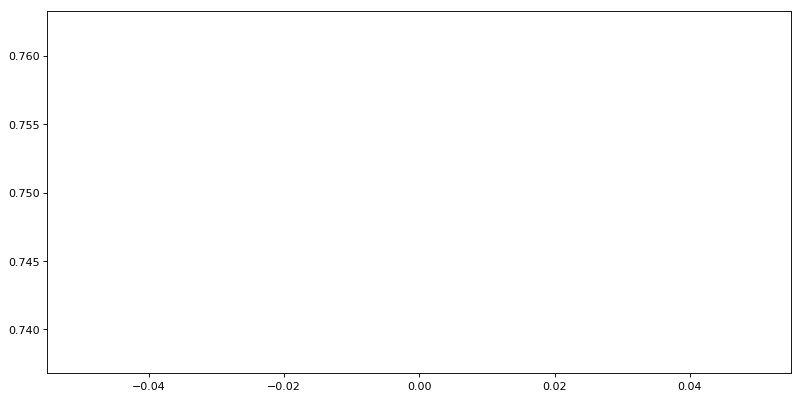

In [446]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xaxis, test_labels[0])
plt.plot(xaxis, rf_pred[0])
plt.plot(xaxis, dummypred[0])

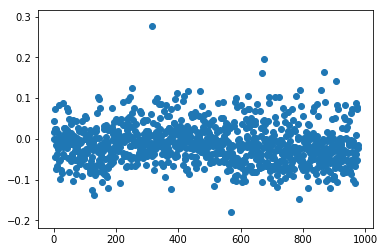

In [354]:
exvar = explained_variance_score(test_labels, rf_pred, multioutput='raw_values')
len(dexvar)
xaxis = np.array(range(0,978))
error=list(exvar)
plt.scatter(xaxis, error)

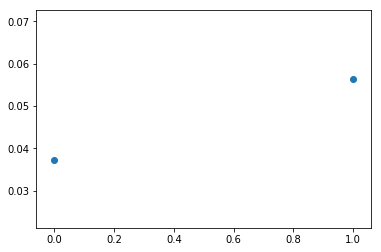

In [320]:
r2 = r2_score(test_labels, rf_pred, multioutput='raw_values')
error=list(r2)
plt.scatter(xaxis, error)

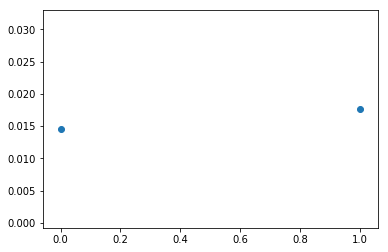

In [321]:
msqerror = mean_squared_error(test_labels, rf_pred, multioutput="raw_values")
len(msqerror)
plt.scatter(xaxis, msqerror)

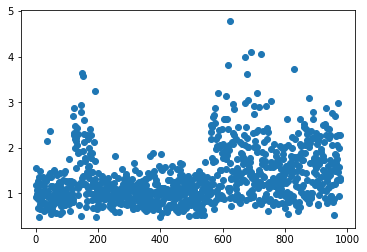

In [142]:
msqerror = mean_squared_error(test_labels, dummypred, multioutput="raw_values")
len(msqerror)
plt.scatter(xaxis, msqerror)

In [21]:
smiles[8443]

'C\\C=C\\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)NCCCN(C)C)[C@@H]2N3C(=O)c2ccccc2F)c1=O.C\\C=C/c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)NCCCN(C)C)[C@@H]2N3C(=O)c2ccccc2F)c1=O'

### Now there are examples where I have pictures with both forms of a racemic mixture

In [22]:
#C\\C=C\\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)NCCCN(C)C)[C@@H]2N3C(=O)c2ccccc2F)c1=O
# AND
#C\\C=C/c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)NCCCN(C)C)[C@@H]2N3C(=O)c2ccccc2F)c1=O